In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

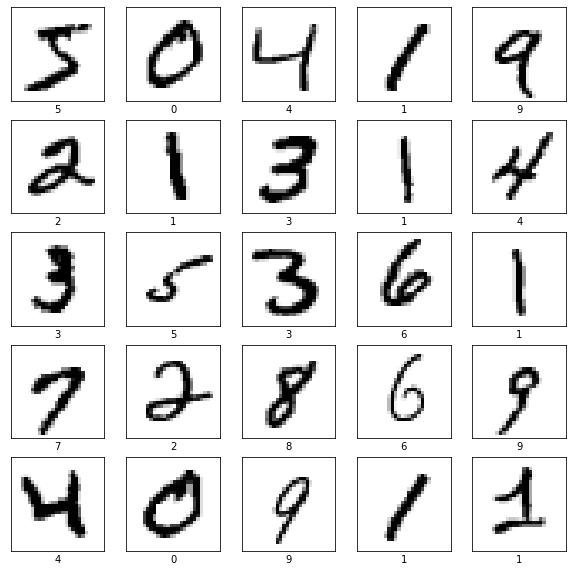

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
def showImage(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

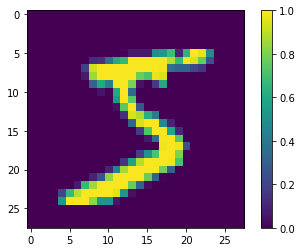

In [6]:
showImage(train_images[0])

In [7]:
img_rows, img_cols = train_images.shape[1], train_images.shape[2]

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

In [8]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [11]:
batch_size = 128
num_epoch = 10

checkpoint_path = "training3_ckpt/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

#latest = tf.train.latest_checkpoint(checkpoint_dir)
#model.load_weights(latest)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

model_log = model.fit(train_images, train_labels,
                      batch_size=batch_size,
                      epochs=num_epoch,
                      callbacks=[cp_callback],
                      verbose=1,
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 962us/sample - loss: 0.2340 - accuracy: 0.9295 - val_loss: 0.0523 - val_accuracy: 0.9831
Epoch 2/10
60000/60000 [==============================] - 56s 933us/sample - loss: 0.0843 - accuracy: 0.9747 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 56s 936us/sample - loss: 0.0637 - accuracy: 0.9810 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 4/10
60000/60000 [==============================] - 56s 936us/sample - loss: 0.0532 - accuracy: 0.9841 - val_loss: 0.0343 - val_accuracy: 0.9897
Epoch 5/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0436 - accuracy: 0.9863
Epoch 00005: saving model to training3_ckpt/cp-0005.ckpt
60000/60000 [==============================] - 56s 935us/sample - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0279 - val_accuracy: 0.9907
Epoch 6/10
60000/60000 [=========================

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.028423147027003506
Test accuracy:  0.9915


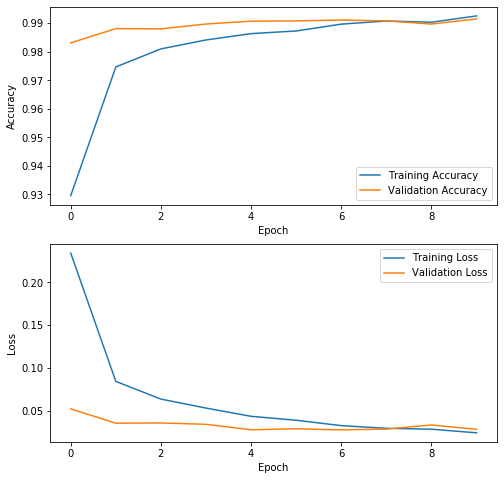

In [13]:
tra_acc = model_log.history['accuracy']
val_acc = model_log.history['val_accuracy']

tra_loss = model_log.history['loss']
val_loss = model_log.history['val_loss']

epochs_range = range(num_epoch)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, tra_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.title('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, tra_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
#plt.title('Loss')
plt.show()

In [23]:
model.save('model3.h5')

In [24]:
img_raw = tf.io.read_file('7.jpg')

img = tf.image.decode_image(img_raw)
img = tf.image.resize(img, [28,28])
img = tf.image.rgb_to_grayscale(img)
img = img.numpy()

#with tf.compat.v1.Session() as sess:
#    img = img.numpy()
#    img = sess.run(tf.image.resize(img, [28,28]))
#    img = sess.run(tf.image.rgb_to_grayscale(img))

img.shape

(28, 28, 1)

In [25]:
def showPhoto(img):
    plt.figure(1)
    plt.imshow(img[:,:,0], cmap='gray')
    plt.show()

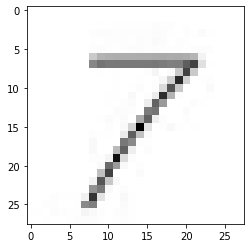

In [26]:
showPhoto(img)

In [27]:
img_pre = img.reshape(-1, 28, 28, 1) / 255.0
img_pre.shape


(1, 28, 28, 1)

In [28]:
pre = model.predict(img_pre)

In [29]:
pre

array([[0.19845566, 0.00728873, 0.04171134, 0.02249582, 0.01611625,
        0.02513653, 0.01503117, 0.42536882, 0.23304965, 0.0153461 ]],
      dtype=float32)

In [30]:
np.argmax(pre)

7

### Test the work of the saved model

In [31]:
new_model = models.load_model('model3.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [32]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 2s - loss: 0.0142 - accuracy: 0.9915
